In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

plt.style.use('default')
sns.set(style="whitegrid") # tipo de grid seaborn

In [2]:
path_clicks = 'clicks.csv.gzip'
clicks = pd.read_csv(path_clicks, compression='gzip')

In [3]:
clicks.shape

(26351, 20)

In [4]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null int64
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null object
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
dtypes: bool(1), float64(11), int64(6), object(2)
memory usage: 3.8+ MB


In [7]:
clicks.head(10)

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525
5,5,NaN,4,2019-03-07T18:02:25.833Z,6333597102633388268,1.209638,1.064208,False,27.0,dhc5iaRvlrI9OgkXDWnMRrAY47xWozY,3.025219e+18,NaN,1.774085e+18,392184377613098015,1.0,NaN,0.606,0.459,1891515180541284343,7925959310979071406
6,3,NaN,1,2019-03-12T15:17:04.453Z,6333597102633388268,1.209638,1.064208,False,27.0,cOm-_s2_6NkoDWYNu_QaMk-v4sf34h4,3.378640e+18,3.032809e+17,4.566454e+18,2733035977666442898,1.0,NaN,NaN,NaN,1891515180541284343,1709687652740629839
7,1,NaN,2,2019-03-06T19:15:47.249Z,6333597102633388268,1.205393,1.077238,False,NaN,MbDYk_2nKmKtOQgAIRx-aDJ66VIGsrE,NaN,NaN,NaN,8930605132947907029,NaN,NaN,NaN,NaN,1891515180541284343,2127839020694198991
8,3,NaN,0,2019-03-07T23:11:01.934Z,6333597102633388268,1.205058,1.077332,False,19.0,1wsFgNNvk6PT1QSSIdmmwmqp0E3k7io,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,3.129,0.889,0.977,1891515180541284343,5073558237453939035
9,3,NaN,1,2019-03-07T23:06:30.642Z,6333597102633388268,1.205689,1.070234,False,18.0,ZLZz1XHsA5Xkuq_TXNfT49j_H4mfTwg,3.378640e+18,NaN,4.566454e+18,2733035977666442898,1.0,1.707,0.466,0.985,1891515180541284343,70349377423764005


In [6]:
clicks.describe()

,advertiser_id,action_id,source_id,country_code,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,26351.000000,0.0,26351.000000,2.635100e+04,26351.000000,26351.000000,26340.000000,2.633900e+04,3.243000e+03,2.633900e+04,2.635100e+04,6235.000000,22977.000000,23011.000000,23011.000000,2.635100e+04,2.635100e+04
mean,2.991993,NaN,1.245266,6.333597e+18,1.206906,1.070233,7.743812,4.635375e+18,4.171028e+18,3.913451e+18,1.299055e+18,1.482277,230.403309,0.638784,1.478656,1.888100e+18,4.611581e+18
std,0.164070,NaN,2.188948,2.089000e+05,0.004484,0.001896,7.017027,1.642969e+18,2.460496e+18,1.885866e+18,1.149672e+18,1.583764,976.849149,0.301983,2.622727,1.721252e+17,2.673175e+18
min,0.000000,NaN,0.000000,6.333597e+18,1.205058,1.058204,0.000000,6.666626e+17,4.513618e+16,7.436481e+17,3.921844e+17,0.000000,0.017000,0.000000,0.000000,1.494519e+18,9.286192e+14
25%,3.000000,NaN,0.000000,6.333597e+18,1.205689,1.070234,3.000000,3.378640e+18,1.975183e+18,1.774085e+18,3.921844e+17,0.000000,2.915000,0.426000,0.183000,1.891515e+18,2.273798e+18
50%,3.000000,NaN,0.000000,6.333597e+18,1.205689,1.070234,6.000000,3.511538e+18,3.516812e+18,3.072849e+18,3.921844e+17,1.000000,10.588000,0.726000,0.645000,1.891515e+18,4.623721e+18
75%,3.000000,NaN,1.000000,6.333597e+18,1.205689,1.070234,13.000000,6.391567e+18,6.589622e+18,4.566454e+18,2.733036e+18,2.000000,71.703000,0.901000,0.991000,1.891515e+18,6.917850e+18
max,8.000000,NaN,10.000000,6.333597e+18,1.237861,1.085358,116.000000,9.081082e+18,9.221733e+18,7.499732e+18,8.930605e+18,13.000000,17616.188000,1.000000,16.600000,6.323872e+18,9.221118e+18


action_id son todos NaN

In [9]:
# Damos formato a la fecha.
clicks['timestamp_format'] = pd.to_datetime(clicks['created'])

# Agrego columna fecha
clicks['date'] = clicks['timestamp_format'].dt.date
# Agrego columna de mes.
clicks['month'] = clicks['timestamp_format'].dt.month
# Agrego columna nombre dia.
clicks['weekday_name'] = clicks['timestamp_format'].dt.weekday_name
# Agrego columna numero dia.
clicks['day'] = clicks['timestamp_format'].dt.day
# Agrego columna de horas
clicks['hour'] = clicks['timestamp_format'].dt.hour

In [10]:
# fecha minima
clicks['timestamp_format'].min()

Timestamp('2019-03-05 01:17:30.663000')

In [12]:
# fecha maxima
clicks['timestamp_format'].max()

Timestamp('2019-03-13 23:59:59.298000')

Los primeros datos son del 5 de marzo de 2019 y el ultimo del 13 de marzo de 2019 (ambos dias limites estan incluidos en el rango de datos validos)

# Cual es el promedio de tiempo que tarda un usuario en hacer click sobre la publicidad segun el dia y hora?

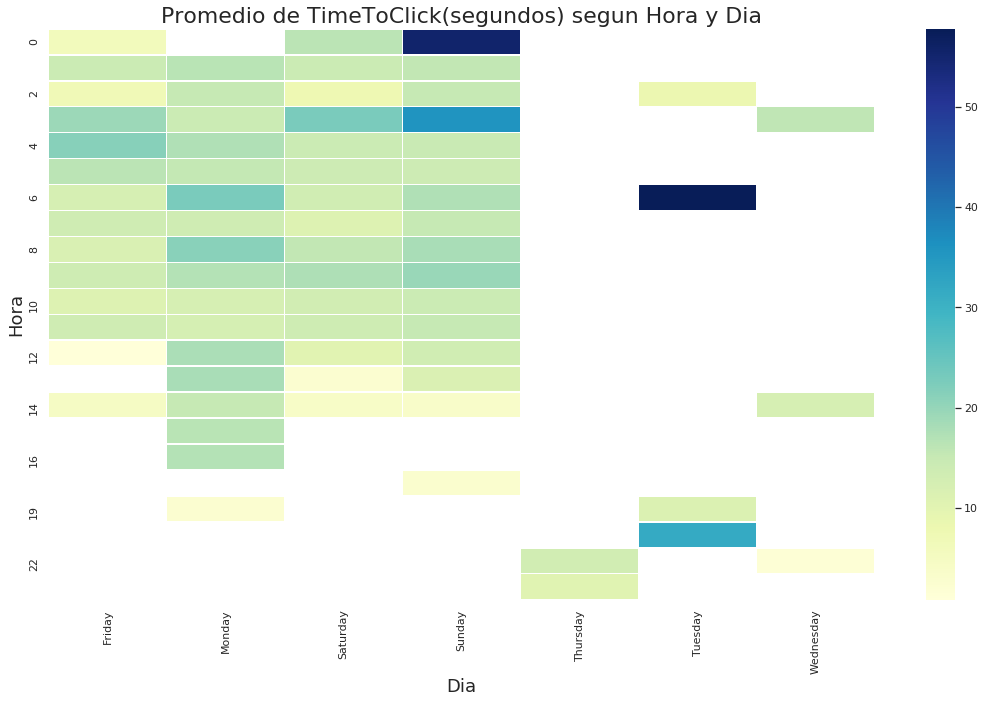

In [53]:
### Promedio de TimeToClick por combinacion de hora en el dia.
# Filtro los dias 12 y 13 para que justo haya 1 semana de data
tabla_semanal = clicks.loc[clicks['day'] < 12,:]
# Filtro los NaN
tabla_semanal['timeToClick'].dropna()
tabla_semanal_menor_90 = tabla_semanal.loc[tabla_semanal['timeToClick'] < 90, :]
for_heatmap_hr_day = tabla_semanal_menor_90.pivot_table(index='hour', columns='weekday_name', values='timeToClick', aggfunc='mean')

g = sns.heatmap(for_heatmap_hr_day , linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Promedio de TimeToClick(segundos) segun Hora y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Hora", fontsize=18)


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/timeToClick_hr_dia.png')

# Top 10 Usuarios que mas clicks hicieron

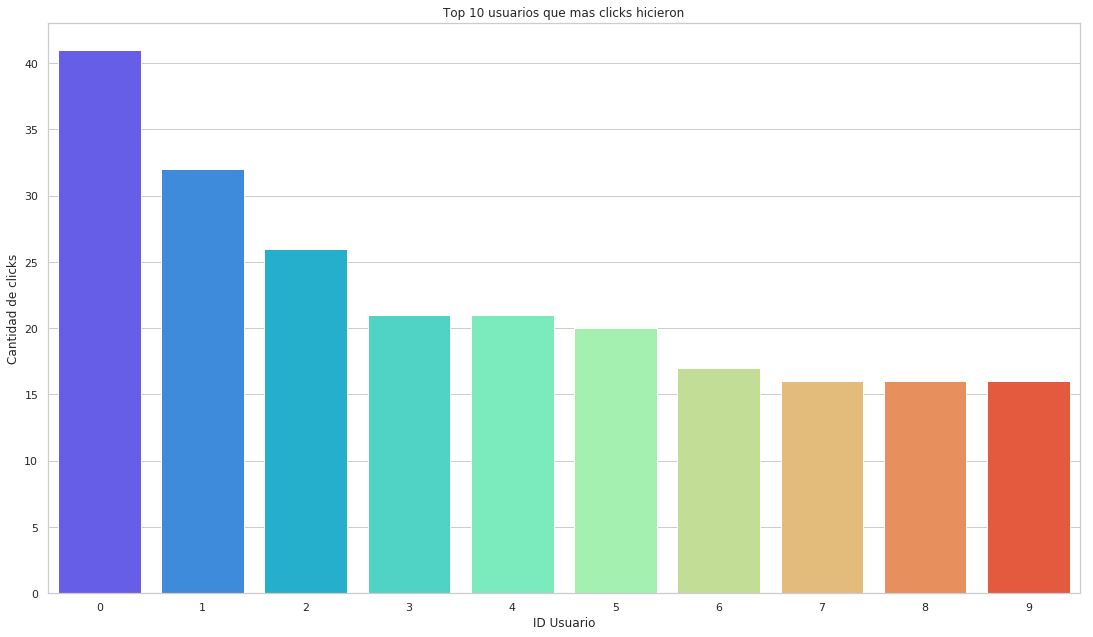

In [75]:
usuarios = clicks.groupby('ref_hash')['advertiser_id'].agg('count').sort_values(ascending=False)[:10]
# como los ref_hash son numeros larguisimos, para que no quede mal el grafico, reseteo indice
usuarios_i = usuarios.reset_index()
g = sns.barplot(x=usuarios_i.index, y=usuarios_i['advertiser_id'].values, palette='rainbow', orient='v')
g.set_xlabel('ID Usuario')
g.set_ylabel('Cantidad de clicks')
g.set_title('Top 10 usuarios que mas clicks hicieron')


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_10_usuarios_clicks.png')